In [1]:
import numpy as np

train_data=np.load('data.npy')
train_target=np.load('target.npy')
test_data=np.load('test_data.npy')
test_target=np.load('test_target.npy')


In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=train_data.shape[1:],kernel_initializer = 'orthogonal'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3),kernel_initializer = 'orthogonal'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(3,3),kernel_initializer = 'orthogonal'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       1280      
                                                                 
 activation (Activation)     (None, 62, 62, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        73792     
                                                                 
 activation_1 (Activation)   (None, 29, 29, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                    

In [3]:
model.load_weights('TEST1.h5')

In [4]:
import os
import cv2
import numpy as np

test_path='testset'

img_names=os.listdir(test_path)
#print(img_names)

category_dict={0:'non-vehicle',1:'Vehicle'}

for img_name in img_names:
    
    img=cv2.imread(os.path.join(test_path,img_name))
    h,w=img.shape[0:2]

    #preprocessing (As done for the training images)
    test_img=cv2.resize(img,(64,64))
    test_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
    test_img=test_img/255
    test_img=test_img.reshape(1,64,64,1)
    
    results=model.predict(test_img)
    #print(results)
    
    label=np.argmax(results,axis=1)[0]
    acc=int(np.max(results,axis=1)[0]*100)
    
    #print(np.argmax(results,axis=1)[0])
    #print(results,label,category_dict[label],acc)
    
    category=category_dict[label]
    
    if(acc<50):
        
        category='Error'
    
    cv2.putText(img,category,(20,40),cv2.FONT_HERSHEY_SIMPLEX,0.6,(255,255,255),2)
    cv2.putText(img,str(acc)+'%',(20,80),cv2.FONT_HERSHEY_SIMPLEX,0.6,(255,255,255),2)
    
    cv2.imshow('LIVE',img)
    k=cv2.waitKey(0)
    if(k==27):
        break
cv2.destroyAllWindows()

1/1 [==============================] - 0s 347ms/step


In [16]:
def detect(img,h=64,w=64,slide=32): #Creating sliding window tecnique to identify images in selected image
    coordinates=[] #Define coordinated function 
    for y in range (0,img.shape[0]-h,slide): #Reduce hight from image shape
        for x in range(0,img.shape[1]-w,slide): #Reducing width form image shape
            window = img[y:y+h,x:x+w]
            
            #cv2.imshow('LIVE',window)
            #k=cv2.waitKey(0)
           # if(k==27):
                #break
           # cv2.destroyAllWindows()#Getting a patch for identify the vehicles
            #print(patch.shape)
            ###############hog_img = feature.hog(window) #Applying patch to hog feature which saved in vehicle detection model
            #image=np.reshape(window,-1)
           #image = np.flatten(window)
           
            window=cv2.resize(window,(64,64))
            window=window/255
            image=window.reshape(1,64,64,1)
            results=model.predict(image) #Applying predictions
            label=np.argmax(results,axis=1)[0]
            category=category_dict[label]
            print(category)
            #print('abc')
            
            if(category=='Vehicle'):
                coordinates.append((x,y,w,h))
                print(window.shape)
    return np.array(coordinates)

(256, 256, 3)


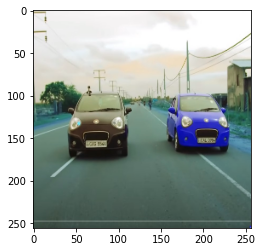

In [6]:
import matplotlib.pyplot as plt

#test_img = cv2.imread('testset/veh000007.png') #Testing above sliding window tecnique to this test image test, dd, cc
test_img = cv2.imread('19.jpg')
plt.imshow(test_img,cmap='gray')
test_img = cv2.resize(test_img,(256,256)) #Resizing the testing image
print(test_img.shape) #Get the image shape in tesing
plt.imshow(test_img,cmap='gray') #Show testing image


1/1 [==============================] - 0s 17ms/step
non-vehicle
1/1 [==============================] - 0s 18ms/step
non-vehicle
1/1 [==============================] - 0s 17ms/step
non-vehicle
1/1 [==============================] - 0s 17ms/step
non-vehicle
1/1 [==============================] - 0s 18ms/step
non-vehicle
1/1 [==============================] - 0s 18ms/step
non-vehicle
1/1 [==============================] - 0s 18ms/step
non-vehicle
1/1 [==============================] - 0s 17ms/step
non-vehicle
1/1 [==============================] - 0s 17ms/step
non-vehicle
1/1 [==============================] - 0s 17ms/step
non-vehicle
1/1 [==============================] - 0s 17ms/step
non-vehicle
1/1 [==============================] - 0s 18ms/step
non-vehicle
1/1 [==============================] - 0s 18ms/step
non-vehicle
1/1 [==============================] - 0s 17ms/step
non-vehicle
1/1 [==============================] - 0s 18ms/step
non-vehicle
1/1 [==============================] - 0

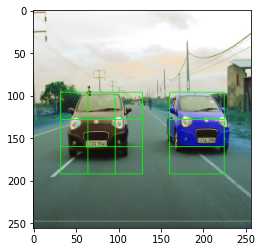

In [7]:
gray = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY) #Converting test image to GRAY

vehicle = detect(gray) #Apply detect function to image

for x,y,w,h in vehicle:
    
    cv2.rectangle(test_img,(x,y),(x+w,y+h),(0,255,0),1) #Apply rectangle to vehicles in the image
    print(x,y,w,h)
#cv2.imshow('test_image',test_img) #Show test image with rectangle
#cv2.waitKey(0) #Close window using ESC
#cv2.destroyAllWindows()

plt.imshow(test_img)

In [26]:
source = cv2.VideoCapture('120.mp4') #Testing above method to a video tt

while(True): #Creating a loop to run above function in every frame    
    ret,img = source.read() #Getting frames from video    
    img = cv2.resize(img,(0,0),fx=0.2,fy=0.2) #Resizing
    
    if(ret==False): #Apply the above function to video same as the above test image
        break
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    vehicle = detect(gray)
    
    for x,y,w,h in vehicle:    
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)    
    cv2.imshow('img',img)
    k=cv2.waitKey(1)
    if(k==27):
        break

cv2.destroyAllWindows()
source.release()

1/1 [==============================] - 0s 16ms/step
non-vehicle
1/1 [==============================] - 0s 17ms/step
non-vehicle
1/1 [==============================] - 0s 16ms/step
non-vehicle
1/1 [==============================] - 0s 17ms/step
non-vehicle
1/1 [==============================] - 0s 16ms/step
non-vehicle
1/1 [==============================] - 0s 18ms/step
non-vehicle
1/1 [==============================] - 0s 16ms/step
non-vehicle
1/1 [==============================] - 0s 17ms/step
non-vehicle
1/1 [==============================] - 0s 17ms/step
non-vehicle
1/1 [==============================] - 0s 18ms/step
non-vehicle
1/1 [==============================] - 0s 19ms/step
non-vehicle
1/1 [==============================] - 0s 19ms/step
non-vehicle
1/1 [==============================] - 0s 17ms/step
non-vehicle
1/1 [==============================] - 0s 17ms/step
non-vehicle
1/1 [==============================] - 0s 17ms/step
non-vehicle
1/1 [==============================] - 0

1/1 [==============================] - 0s 19ms/step
non-vehicle
1/1 [==============================] - 0s 18ms/step
non-vehicle
1/1 [==============================] - 0s 18ms/step
non-vehicle
1/1 [==============================] - 0s 18ms/step
non-vehicle
1/1 [==============================] - 0s 18ms/step
non-vehicle
1/1 [==============================] - 0s 18ms/step
Vehicle
(64, 64)
1/1 [==============================] - 0s 18ms/step
non-vehicle
1/1 [==============================] - 0s 18ms/step
non-vehicle
1/1 [==============================] - 0s 17ms/step
Vehicle
(64, 64)
1/1 [==============================] - 0s 19ms/step
non-vehicle
1/1 [==============================] - 0s 18ms/step
non-vehicle
1/1 [==============================] - 0s 19ms/step
non-vehicle
1/1 [==============================] - 0s 18ms/step
non-vehicle
1/1 [==============================] - 0s 18ms/step
non-vehicle
1/1 [==============================] - 0s 17ms/step
non-vehicle
1/1 [=========================